# **Bike Sharing**

[Sumber data Capital Bikeshare](http://capitalbikeshare.com/system-data) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem and Understanding**

### **a. Context**

Sistem bike-sharing adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses, mulai dari keanggotaan, penyewaan, hingga pengembalian, telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari suatu lokasi tertentu dan mengembalikannya di lokasi lain. Saat ini, terdapat lebih dari 500 program bike-sharing di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, sistem ini sangat diminati karena perannya yang penting dalam masalah lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi dunia nyata yang menarik dari sistem bike-sharing, karakteristik data yang dihasilkan oleh sistem ini juga menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini menjadikan sistem bike-sharing sebagai jaringan sensor virtual yang dapat digunakan untuk memantau mobilitas di kota. Oleh karena itu, diharapkan peristiwa-peristiwa penting di kota dapat terdeteksi dengan memantau data ini.

### **b. Problem Statement**

Sistem bike sharing menghadapi tantangan utama dalam menjaga ketersediaan sepeda yang cukup untuk memenuhi kebutuhan pengguna pada waktu-waktu tertentu. Ketersediaan sepeda ini sangat dipengaruhi oleh beberapa faktor, antara lain permintaan yang fluktuatif (misalnya perubahan jumlah pengguna pada jam sibuk, hari libur, atau musim tertentu), kondisi sepeda yang dapat dipergunakan dengan baik (karena sepeda yang rusak atau sedang dalam perawatan tidak dapat digunakan), serta risiko vandalisme dan pencurian yang dapat mengurangi jumlah sepeda yang siap disewakan. Ketidakmampuan dalam mengantisipasi dan mengelola faktor-faktor tersebut dapat menyebabkan kekurangan sepeda saat permintaan tinggi, menurunkan kepuasan pelanggan, dan mengganggu operasional layanan.

Penelitian ini bertujuan untuk memprediksi jumlah sepeda yang harus disediakan pada waktu tertentu dengan mempertimbangkan faktor-faktor tersebut, sehingga operator dapat menjaga ketersediaan sepeda secara optimal dan meningkatkan kualitas layanan kepada pengguna.

### **c. Goals**

Berdasarkan permasalahan tersebut, operator layanan bike sharing perlu memiliki alat bantu (tool) yang dapat memprediksi serta membantu mereka dalam **menentukan jumlah sepeda yang ideal untuk disediakan pada waktu-waktu tertentu**. Dengan mempertimbangkan berbagai faktor seperti fluktuasi permintaan, kondisi sepeda yang dapat dipergunakan dengan baik, serta risiko vandalisme dan pencurian, prediksi yang dihasilkan akan semakin akurat dan relevan dengan kebutuhan di lapangan.

Bagi operator, adanya prediction tool yang mampu memberikan rekomendasi jumlah sepeda secara optimal akan membantu menjaga ketersediaan sepeda, meningkatkan kepuasan pengguna, serta mendukung efisiensi operasional. Dengan demikian, layanan bike sharing dapat berjalan lebih lancar, jumlah pengguna dapat meningkat, dan pada akhirnya berdampak positif terhadap pendapatan serta citra perusahaan.

### **d. Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk menemukan pola dari berbagai fitur yang memengaruhi jumlah sepeda yang digunakan, seperti waktu, cuaca, hari libur, dan musim.

Selanjutnya, kita akan mempergunakan model prediksi, seperti regresi, yang akan membantu operator bike sharing untuk menyediakan alat bantu (tool) prediksi jumlah sepeda yang perlu disediakan pada waktu tertentu. Tool ini akan sangat berguna bagi operator dalam menjaga ketersediaan sepeda secara optimal dan meningkatkan kualitas layanan kepada pengguna.

### **e. Metric Evaluation**

Evaluasi model akan menggunakan metrik RMSE, MAE, dan MAPE. RMSE (Root Mean Squared Error) mengukur rata-rata akar kuadrat dari error, MAE (Mean Absolute Error) mengukur rata-rata nilai absolut error, dan MAPE (Mean Absolute Percentage Error) mengukur rata-rata persentase error dari prediksi model. Semakin kecil nilai RMSE, MAE, dan MAPE, semakin akurat model dalam memprediksi jumlah sepeda yang perlu disediakan.

Jika model yang digunakan adalah model linear, kita juga dapat menggunakan nilai R-squared atau adjusted R-squared untuk menilai seberapa baik model menjelaskan variasi data. Nilai R-squared yang mendekati 1 menunjukkan model semakin baik dalam merepresentasikan data observasi. Namun, metrik ini tidak relevan untuk model non-linear.

## **2. Data Understanding**

- Dataset merupakan data peminjaman sepeda (bike sharing) yang berisi informasi penggunaan sepeda di suatu kota pada tahun 2011–2012.
- Setiap baris data merepresentasikan jumlah sepeda yang digunakan pada waktu tertentu beserta kondisi lingkungan dan waktu saat peminjaman terjadi.

### **a. Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | date |
| season | Integer | season (1: winter, 2: spring, 3: summer, 4: fall) |
| hr | Integer | hour (0 to 23) |
| holiday | Integer | holiday or not |
| temp | Float | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| hum | Float | normalized humidity. The values are divided into 100 (max) |
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| casual | Integer | count of casual users |
| registered | Integer | count of registered users |
| cnt | Integer | count of total rental bikes including both casual and registered |

<br>

### **b. Explanatory Data Analysis**

In [2]:
# ────────────────────────────────────────────────────────
# 🧮 Data Manipulation & Analysis
# ────────────────────────────────────────────────────────
import numpy as np                      # Fundamental package for numerical computing in Python
import pandas as pd                     # Primary library for data manipulation (DataFrames, Series)
# ────────────────────────────────────────────────────────
# 📈 Visualization
# ────────────────────────────────────────────────────────
import matplotlib.pyplot as plt         # Core plotting library
import seaborn as sns                   # High-level interface for statistical visualizations
import scipy.stats as stats             # Statistical functions

# ────────────────────────────────────────────────────────
# 🤖 Scikit-Learn: Model Selection & Evaluation
# ────────────────────────────────────────────────────────
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# ────────────────────────────────────────────────────────
# 🛠️ Scikit-Learn: Preprocessing & Transformers
# ────────────────────────────────────────────────────────
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# ────────────────────────────────────────────────────────
# 📏 Scikit-Learn: Metrics
# ────────────────────────────────────────────────────────
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

# ────────────────────────────────────────────────────────
# 🚀 Scikit-Learn: Models & Pipelines
# ────────────────────────────────────────────────────────
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# ────────────────────────────────────────────────────────
# 🛠️ Scikit-Learn: Feature Importance
# ────────────────────────────────────────────────────────
from sklearn.inspection import permutation_importance

In [3]:
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [4]:
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


In [5]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
date_to_display = 1
random_ints = np.random.randint(0, len(df), size=date_to_display)
random_ints
for i in random_ints:
    date = df.loc[i, 'dteday']
    print('Total hours captured:', len(df[df['dteday'] == date]), 'hours')
    display(df[df['dteday'] == date])

Total hours captured: 17 hours


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
335,2012-05-23,0.78,2,0,2,0.5909,0.62,9,39,258,297
366,2012-05-23,0.61,2,0,2,0.6515,0.70,15,65,192,257
601,2012-05-23,0.83,2,0,2,0.5758,0.62,22,23,136,159
1583,2012-05-23,0.83,1,0,2,0.5606,0.60,1,23,9,32
4721,2012-05-23,0.61,3,0,2,0.6515,0.70,16,62,216,278
4853,2012-05-23,0.83,2,0,2,0.5758,0.62,19,40,336,376
6236,2012-05-23,0.83,2,0,2,0.5758,0.62,21,24,221,245
6578,2012-05-23,0.69,3,0,2,0.6061,0.64,17,45,240,285
7082,2012-05-23,0.78,1,0,2,0.5909,0.62,0,19,28,47
7503,2012-05-23,0.83,1,0,2,0.5606,0.60,23,23,83,106


In [8]:
# Count the number of rows (hours) for each date
date_counts = df['dteday'].value_counts()

# Find the maximum count
max_count = date_counts.max()

# Find all dates with the maximum count
max_dates = date_counts[date_counts == max_count].index

print(f"Dates with the most hours captured ({max_count} hours):")
for i, date in enumerate(max_dates, 1):
    print(f"{i}. Date: {date}")
print('Total dates with the most hours captured:', len(max_dates))

# Find the minimum count
min_count = date_counts.min()

# Find all dates with the minimum count
min_dates = date_counts[date_counts == min_count].index

print(f"\nDates with the fewest hours captured ({min_count} hours):")
for i, date in enumerate(min_dates, 1):
    print(f"{i}. Date: {date}")
print('Total dates with the fewest hours captured:', len(min_dates))

Dates with the most hours captured (22 hours):
1. Date: 2012-03-02
2. Date: 2011-08-17
3. Date: 2012-07-08
4. Date: 2012-07-07
5. Date: 2011-08-09
6. Date: 2012-07-04
7. Date: 2011-05-26
8. Date: 2012-09-29
9. Date: 2011-02-01
Total dates with the most hours captured: 9

Dates with the fewest hours captured (1 hours):
1. Date: 2012-10-29
Total dates with the fewest hours captured: 1


- Diketahui bahwa catatan harian mencatat bahwa jumlah maksimum yang tercatat tiap harinya adalah 22 jam
- Jumlah hari dengan jumlah maksimum ada 9 hari, maka sisanya kurang dari 22 jam
- Diketahui bahwa catatan harian mencatat bahwa jumlah minimum yang tercatat tiap harinya adalah 1 jam
- Jumlah hari dengan jumlah minimum ada 1 hari


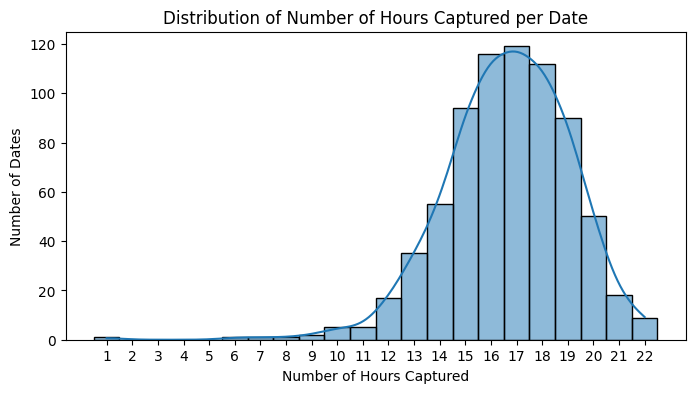

In [9]:
date_counts = df['dteday'].value_counts()
date_counts = date_counts.reset_index()
date_counts.columns = ['dteday', 'hour_count']

plt.figure(figsize=(8, 4))
bins = np.arange(date_counts['hour_count'].min(), date_counts['hour_count'].max() + 2) - 0.5
sns.histplot(date_counts['hour_count'], bins=bins, kde=True)
plt.title('Distribution of Number of Hours Captured per Date')
plt.xlabel('Number of Hours Captured')
plt.ylabel('Number of Dates')
plt.xticks(np.arange(date_counts['hour_count'].min(), date_counts['hour_count'].max() + 1))
plt.show()

- Diketahui bahwa rentang jam yang tercatat dalam catatan harian peminjaman paling banyak ada pada jam 12-22

In [10]:
df['dteday'] = pd.to_datetime(df['dteday'])
# ─── calendar features ─────────────────────────────────────────────
df['year']       = df['dteday'].dt.year
df['month']      = df['dteday'].dt.month
df['date']       = df['dteday'].dt.day
df['dayofweek']  = df['dteday'].dt.dayofweek
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

# ─── concise column reorder ────────────────────────────────────────
core = ['dteday','year','month','date','dayofweek','is_weekend']
rest = [c for c in df.columns if c not in core]
df   = df[ core + rest ]

In [11]:
# Map season numbers to names
season_map = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
df['season_name'] = df['season'].map(season_map)

# Group by season_name only (unsplit)
season_usage_total = df.groupby('season_name')[['cnt']].sum().reset_index()

# Sort season names by total users descending
season_order = season_usage_total.sort_values('cnt', ascending=False)['season_name']

# Group by year and season_name
season_usage_year = df.groupby(['season_name', 'year'])[['cnt']].sum().reset_index()

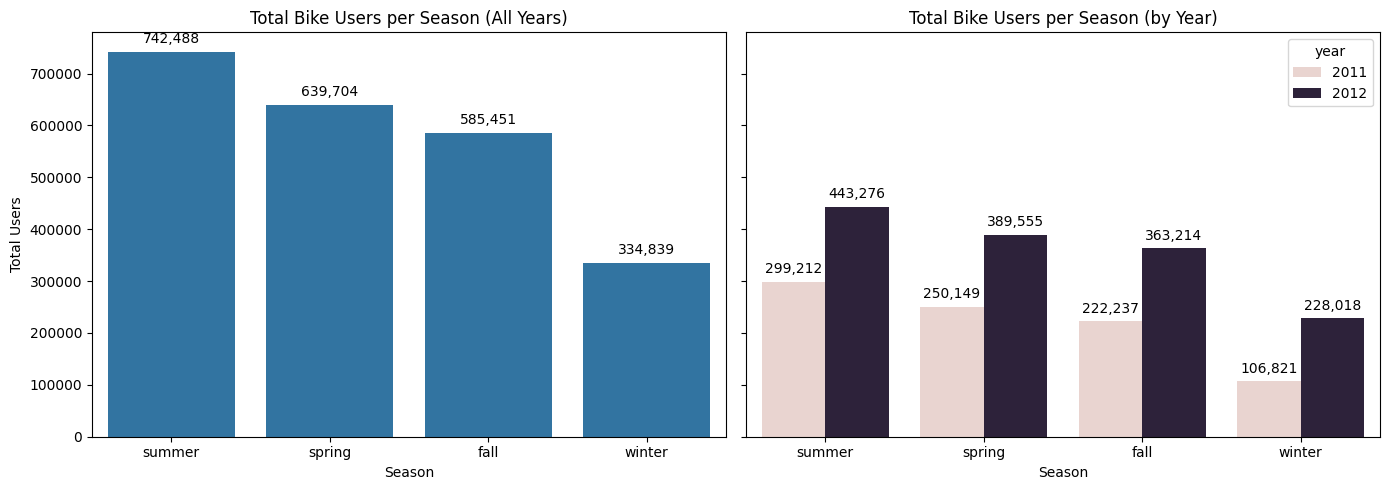

In [12]:
# Prepare subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Chart 1: Total bike users per season (all years), sorted
sns.barplot(
    data=season_usage_total,
    x='season_name',
    y='cnt',
    order=season_order,
    ax=axes[0]
)
axes[0].set_title('Total Bike Users per Season (All Years)')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Total Users')
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom',
                     xytext=(0, 4), textcoords='offset points')

# Chart 2: Total bike users per season by year, sorted
sns.barplot(
    data=season_usage_year,
    x='season_name',
    y='cnt',
    hue='year',
    order=season_order,
    ax=axes[1]
)
axes[1].set_title('Total Bike Users per Season (by Year)')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(f'{int(height):,}',
                         (p.get_x() + p.get_width() / 2, height),
                         ha='center', va='bottom',
                         xytext=(0, 4), textcoords='offset points')

plt.tight_layout()
plt.show()

df.drop(columns='season_name', inplace=True)

- Dapat dilihat dari grafik ini bahwa pelanggan memiliki preferensi musim untuk meminjam sepeda dengan urutan sebagai berikut:
    - Summer (Musim Panas)
    - Spring (Musim Semi)
    - Fall (Musim Gugur)
    - Winter (Musim Dingin)

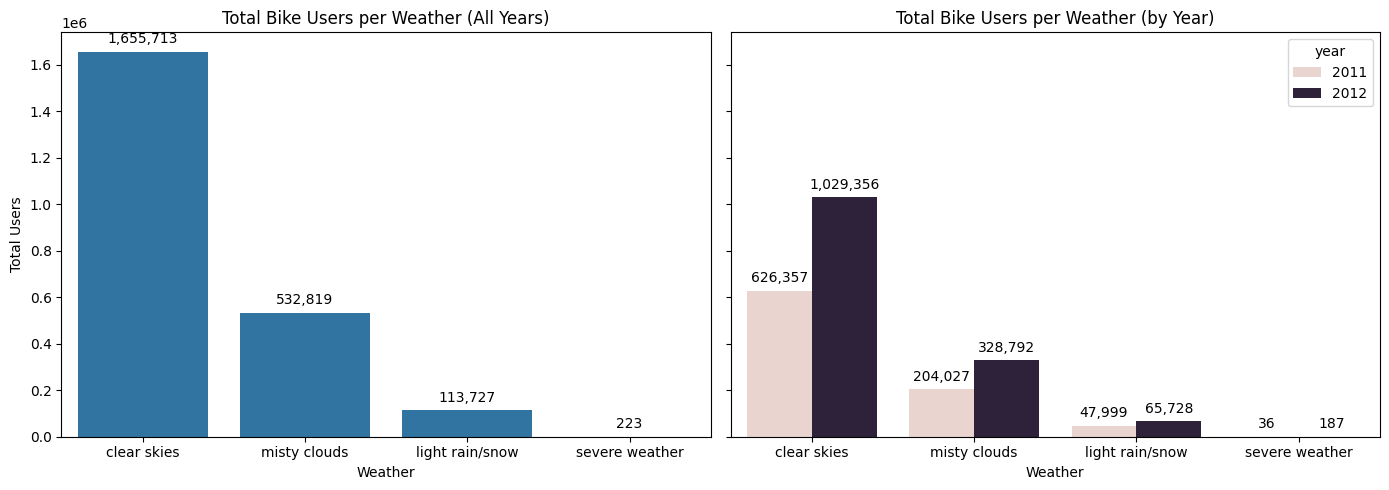

In [13]:
# Map weather numbers to names
weather_map = {
    1: 'clear skies',
    2: 'misty clouds',
    3: 'light rain/snow',
    4: 'severe weather'
}
df['weather_name'] = df['weathersit'].map(weather_map)

# Group by weather_name only (unsplit)
weather_usage_total = df.groupby('weather_name')[['cnt']].sum().reset_index()

# Sort weather names by total users descending
weather_order = weather_usage_total.sort_values('cnt', ascending=False)['weather_name']

# Group by year and weather_name
weather_usage_year = df.groupby(['weather_name', 'year'])[['cnt']].sum().reset_index()

# Prepare subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Chart 1: Total bike users per weather (all years), sorted
sns.barplot(
    data=weather_usage_total,
    x='weather_name',
    y='cnt',
    order=weather_order,
    ax=axes[0]
)
axes[0].set_title('Total Bike Users per Weather (All Years)')
axes[0].set_xlabel('Weather')
axes[0].set_ylabel('Total Users')
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}',
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom',
                     xytext=(0, 4), textcoords='offset points')

# Chart 2: Total bike users per weather by year, sorted
sns.barplot(
    data=weather_usage_year,
    x='weather_name',
    y='cnt',
    hue='year',
    order=weather_order,
    ax=axes[1]
)
axes[1].set_title('Total Bike Users per Weather (by Year)')
axes[1].set_xlabel('Weather')
axes[1].set_ylabel('')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].annotate(f'{int(height):,}',
                         (p.get_x() + p.get_width() / 2, height),
                         ha='center', va='bottom',
                         xytext=(0, 4), textcoords='offset points')

plt.tight_layout()
plt.show()

df.drop(columns='weather_name', inplace=True)

- Dapat dilihat dari grafik ini bahwa pelanggan memiliki preferensi cuaca untuk meminjam sepeda dengan urutan sebagai berikut:
    - Clear Skies (Cuaca Cerah)
    - Mist Clouds (Cuaca Berawan)
    - Light Rain/Snow (Cuaca Curah Hujan Sedikit)
    - Severe Weather (Cuaca Ekstrim)

In [14]:
daily_df = (
    df.groupby('dteday')
      .agg(
          totalhr     = ('dteday', 'count'),
          holiday     = ('holiday', lambda x: x.mode().iat[0]),
          season      = ('season',  lambda x: x.mode().iat[0]),
          casual      = ('casual', 'sum'),
          registered  = ('registered', 'sum'),
          cnt         = ('cnt', 'sum')
      )
      .reset_index()
)
daily_df.head()

,dteday,totalhr,holiday,season,casual,registered,cnt
0,2011-01-01,15,0,1,196,409,605
1,2011-01-02,15,0,1,69,375,444
2,2011-01-03,16,0,1,90,1039,1129
3,2011-01-04,18,0,1,104,1219,1323
4,2011-01-05,20,0,1,74,1402,1476


C:\Users\danny\AppData\Local\Temp\ipykernel_34720\580809622.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\danny\AppData\Local\Temp\ipykernel_34720\580809622.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


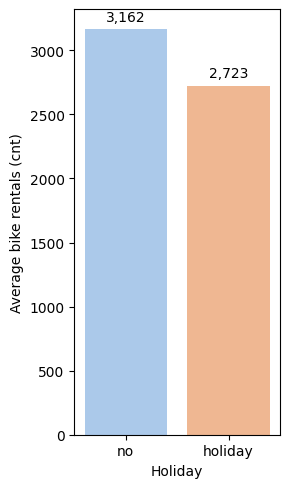

In [15]:
plt.figure(figsize=(3, 5))

daily_df['holiday_str'] = daily_df['holiday'].map({0: 'no', 1: 'holiday'})

ax = sns.barplot(
    data=daily_df,
    x='holiday_str',
    y='cnt',
    estimator=np.mean,
    palette='pastel',
    ci=None
)

for p in ax.patches:
    total = p.get_height()
    ax.annotate(f'{total:,.0f}',
                (p.get_x() + p.get_width()/2, total),
                ha='center', va='bottom',
                xytext=(0, 4), textcoords='offset points')

ax.set_xlabel('Holiday')
ax.set_ylabel('Average bike rentals (cnt)')

plt.tight_layout()
plt.show()

daily_df.drop(columns='holiday_str', inplace=True)

- Rata-rata pengguna menyewa sepeda lebih banyak pada hari tidak libur
- Tetapi perbedaannya tidak begitu signifikan

Average Rentals by Hour and Season (0-23):


season_name,fall,spring,summer,winter
hr,,,,
0,55.235772,55.946970,74.246377,26.897059
1,33.961832,33.096774,44.913793,18.869565
2,22.962406,22.148760,31.288000,13.843478
3,11.508475,11.401575,14.406015,7.141509
4,7.540541,6.336000,8.022059,2.990991
5,23.851852,19.257353,26.267176,10.762295
6,84.863248,79.650794,99.696296,42.140625
7,231.305785,211.377049,277.152672,115.503704
8,417.208333,393.573529,414.375000,238.583333


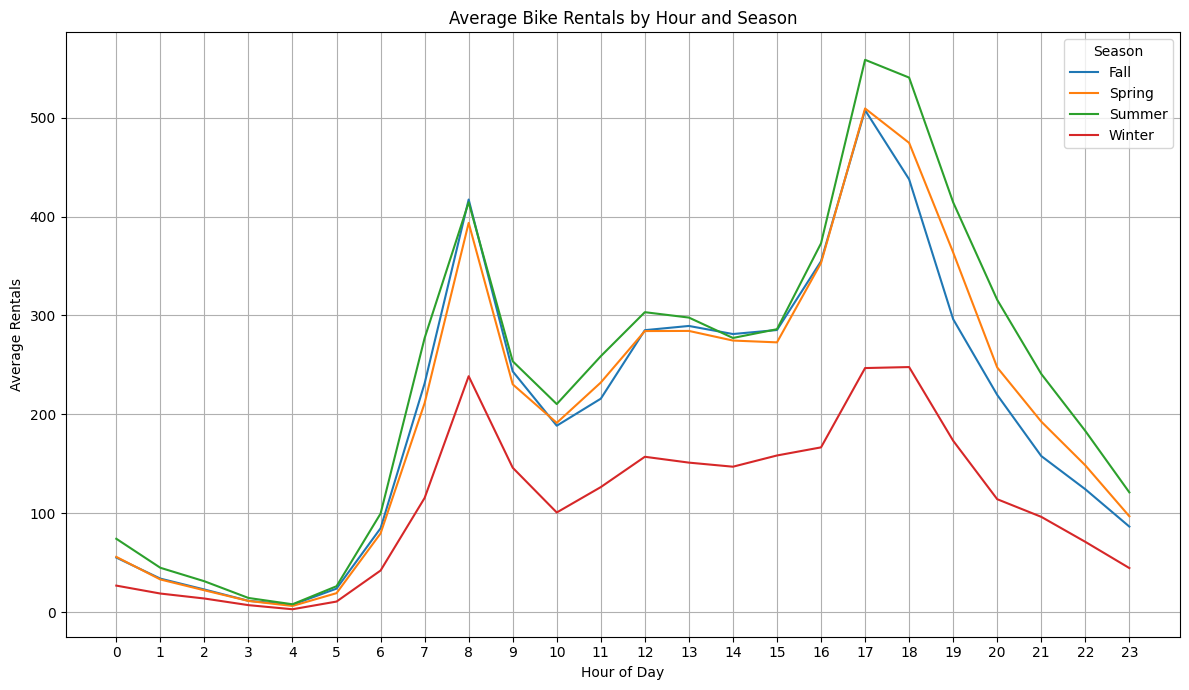

In [16]:
# Map season numbers to names
season_map = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
df['season_name'] = df['season'].map(season_map)

# Create the pivot table
pivot_hour_season = pd.pivot_table(
    df,
    values='cnt',
    index='hr',
    columns='season_name',
    aggfunc='mean',
    fill_value=0
)

# Ensure hour bins are from 0 to 23
full_hours = np.arange(0, 24)
pivot_hour_season = pivot_hour_season.reindex(full_hours, fill_value=0)

print("Average Rentals by Hour and Season (0-23):")
display(pivot_hour_season)

# Line plot only
plt.figure(figsize=(12, 7))
for season in pivot_hour_season.columns:
    plt.plot(
        pivot_hour_season.index,
        pivot_hour_season[season],
        label=season.capitalize()
    )

plt.title('Average Bike Rentals by Hour and Season')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(full_hours)
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()
plt.show()

# Remove the 'season_name' column after plotting, if desired
df.drop(columns='season_name', inplace=True)

- Dapat dilihat bahwa penyewa sepeda mulai ada banyak meminjam pada jam 7 hingga jam 22
- Peminjaman terendah ada pada musim Dingin

Average Rentals by Hour and Weather Situation (0–23):


weather_name,clear skies,light rain/snow,misty clouds,severe weather
hr,,,,
0,59.443213,25.628571,43.060150,0.0
1,34.105740,13.105263,32.784173,23.0
2,22.489426,17.609756,25.172131,0.0
3,11.948485,5.892857,10.880952,0.0
4,6.388889,4.433333,6.581395,0.0
5,20.355623,16.645161,20.609756,0.0
6,79.649842,62.941176,73.735484,0.0
7,217.962500,130.630435,209.223776,0.0
8,373.378882,208.717949,398.728477,0.0


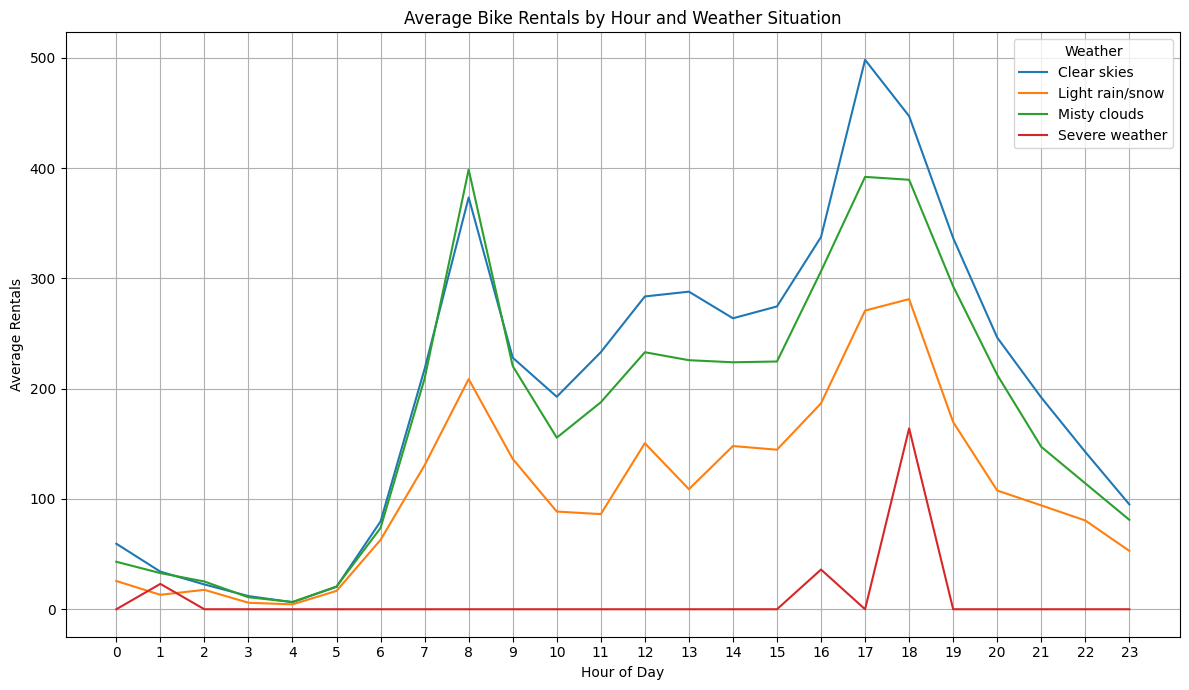

In [17]:
# - 1: Clear skies      : Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Misty clouds     : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light rain/snow  : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Severe weather   : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

# Map weather situation numbers to names
weather_map = {
    1: 'clear skies',
    2: 'misty clouds',
    3: 'light rain/snow',
    4: 'severe weather'
}
df['weather_name'] = df['weathersit'].map(weather_map)

# Create the pivot table
pivot_weather = pd.pivot_table(
    df,
    values='cnt',
    index='hr',
    columns='weather_name',
    aggfunc='mean',
    fill_value=0
)

# Ensure hour bins are from 0 to 23
full_hours = np.arange(0, 24)
pivot_weather = pivot_weather.reindex(full_hours, fill_value=0)

print("Average Rentals by Hour and Weather Situation (0–23):")
display(pivot_weather)

# Line plot only
plt.figure(figsize=(12, 7))
for weather in pivot_weather.columns:
    plt.plot(
        pivot_weather.index,
        pivot_weather[weather],
        label=weather.capitalize()
    )

plt.title('Average Bike Rentals by Hour and Weather Situation')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(full_hours)
plt.legend(title='Weather')
plt.grid(True)
plt.tight_layout()
plt.show()

# Remove the 'weather_name' column after plotting, if desired
df.drop(columns='weather_name', inplace=True)

- Dapat dilihat bahwa penyewa sepeda mulai ada banyak meminjam pada jam 7 hingga jam 22
- Pada cuaca ekstrim penggunaan sepeda hanya terdapat pada jam 1, 16, dan 18.

## **3. Data Preprocessing**

In [18]:
for col in df.columns:
    if df[col].dtype == 'int32':
        df[col] = df[col].astype('int64')
df.dtypes

dteday        datetime64[ns]
year                   int64
month                  int64
date                   int64
dayofweek              int64
is_weekend             int64
hum                  float64
weathersit             int64
holiday                int64
season                 int64
atemp                float64
temp                 float64
hr                     int64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [19]:
df_model = df.copy()
df_model

,dteday,year,month,date,dayofweek,is_weekend,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,2011,12,9,4,0,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,2012,6,17,6,1,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,2011,6,15,2,0,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,2012,3,31,5,1,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,2012,7,31,1,0,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,2012,1,25,2,0,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,2012,7,6,4,0,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,2012,2,20,0,0,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,2012,3,31,5,1,0.77,2,0,2,0.4242,0.42,2,14,55,69


- Kolom 'dteday' dihapus karena sudah dijabarkan ke dalam kolom lain seperti 'year', 'month' dan 'date'
- Karena kolom 'casual' dan 'registered' adalah hasil penjabaran dari kolom 'cnt'. Berarti kolom 'casual' dan 'registered' juga bisa dianggap kita anggap ke dalam satu kesatuan label dengan kolom 'cnt'

In [20]:
df_model.drop(columns=['dteday', 'casual', 'registered'], inplace=True)
df_model

,year,month,date,dayofweek,is_weekend,hum,weathersit,holiday,season,atemp,temp,hr,cnt
0,2011,12,9,4,0,0.62,1,0,4,0.3485,0.36,16,250
1,2012,6,17,6,1,0.64,1,0,2,0.5152,0.54,4,18
2,2011,6,15,2,0,0.53,1,0,2,0.6212,0.62,23,107
3,2012,3,31,5,1,0.87,2,0,2,0.3485,0.36,8,145
4,2012,7,31,1,0,0.55,1,0,3,0.6970,0.76,18,857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012,1,25,2,0,0.75,1,0,1,0.2273,0.24,7,257
12161,2012,7,6,4,0,0.62,1,0,3,0.7424,0.78,0,102
12162,2012,2,20,0,0,0.60,2,1,1,0.2121,0.24,5,6
12163,2012,3,31,5,1,0.77,2,0,2,0.4242,0.42,2,69


Season dan weather akan diubah ke dalam strings supaya nantinya akan diencoding menggunakan onehot encoder

In [21]:
season_map = {1: 'winter',
              2: 'spring',
              3: 'summer',
              4: 'fall'}
df['season'] = df['season'].map(season_map)

weather_map = {
    1: 'clear skies',
    2: 'misty clouds',
    3: 'light rain/snow',
    4: 'severe weather'
}
df['weathersit'] = df['weathersit'].map(weather_map)

## **4. Modeling**

In [22]:
X = df_model.drop(columns='cnt')
y = df_model['cnt']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=99
)

In [24]:
X_train

,year,month,date,dayofweek,is_weekend,hum,weathersit,holiday,season,atemp,temp,hr
7157,2011,4,9,5,1,0.93,2,0,2,0.3485,0.36,22
2550,2012,7,21,5,1,0.83,2,0,3,0.5606,0.60,11
5312,2012,9,17,0,0,0.65,2,0,3,0.6061,0.64,14
7282,2012,11,16,4,0,0.53,1,0,4,0.3030,0.32,23
11112,2011,3,30,2,0,0.45,2,0,2,0.3030,0.32,9
...,...,...,...,...,...,...,...,...,...,...,...,...
7890,2011,8,22,0,0,0.28,1,0,3,0.6515,0.72,18
1768,2012,1,3,1,0,0.55,1,0,1,0.1364,0.16,8
9929,2011,9,4,6,1,0.74,2,0,3,0.6970,0.72,22
3240,2011,5,9,0,0,0.55,1,0,2,0.5000,0.52,8


In [25]:
X

,year,month,date,dayofweek,is_weekend,hum,weathersit,holiday,season,atemp,temp,hr
0,2011,12,9,4,0,0.62,1,0,4,0.3485,0.36,16
1,2012,6,17,6,1,0.64,1,0,2,0.5152,0.54,4
2,2011,6,15,2,0,0.53,1,0,2,0.6212,0.62,23
3,2012,3,31,5,1,0.87,2,0,2,0.3485,0.36,8
4,2012,7,31,1,0,0.55,1,0,3,0.6970,0.76,18
...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012,1,25,2,0,0.75,1,0,1,0.2273,0.24,7
12161,2012,7,6,4,0,0.62,1,0,3,0.7424,0.78,0
12162,2012,2,20,0,0,0.60,2,1,1,0.2121,0.24,5
12163,2012,3,31,5,1,0.77,2,0,2,0.4242,0.42,2


In [26]:
X.columns

Index(['year', 'month', 'date', 'dayofweek', 'is_weekend', 'hum', 'weathersit',
       'holiday', 'season', 'atemp', 'temp', 'hr'],
      dtype='object')

In [27]:
df_model_describe = df_model.describe().loc[['std', 'min', 'max']].T
df_model_describe['range'] = df_model_describe['max'] - df_model_describe['min']
df_model_describe

,std,min,max,range
year,0.500017,2011.00,2012.0,1.00
month,3.433995,1.00,12.0,11.00
date,8.805860,1.00,31.0,30.00
dayofweek,1.992993,0.00,6.0,6.00
is_weekend,0.451901,0.00,1.0,1.00
hum,0.192102,0.00,1.0,1.00
weathersit,0.635937,1.00,4.0,3.00
holiday,0.169925,0.00,1.0,1.00
season,1.106157,1.00,4.0,3.00
atemp,0.171857,0.00,1.0,1.00


In [28]:
df_model.dtypes.reset_index()

,index,0
0,year,int64
1,month,int64
2,date,int64
3,dayofweek,int64
4,is_weekend,int64
5,hum,float64
6,weathersit,int64
7,holiday,int64
8,season,int64
9,atemp,float64


#### Preprocessing Data untuk Model
- pada kolom 'month', 'date', 'dayofweek', 'hr' dilakukan CyclicalEncoder karena isi data pada kolom tersebut masuk ke dalam sebuah siklus bulan, tanggal, hari dalam satu minggu dan jam dalam satu hari dan tidak bernilai kontinu
- pada kolom 'year', 'season', 'weathersit' dilakukan OneHotEncoder karena merupakan sebuah kategori
- pada kolom 'hum', 'atemp', 'temp' dilakukan scaling untuk membuat machine learning tidak bias, walaupun nilainya sudah dalam skala 0-1 dengan distribusi normal nantinya akan dimasukkan ke dalam HyperParameterTuning untuk mendapatkan Scaler yang paling baik untuk menghasilkan nilai Metric yang paling baik

In [29]:
cyclical = ['month', 'date', 'dayofweek', 'hr']
encoder = ['year', 'season', 'weathersit']
scaler = ['hum', 'atemp', 'temp']

deleteit = cyclical + encoder + scaler + ['cnt']

sisanya = df_model.drop(columns=deleteit).columns
sisanya

Index(['is_weekend', 'holiday'], dtype='object')

In [30]:
# untuk mengencode cyclical features seperti jam, tanggal, bulan, tahun
class CyclicalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, max_value):
        self.max_value = max_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.asarray(X).astype(float)
        sin_col = np.sin(2 * np.pi * X / self.max_value)
        cos_col = np.cos(2 * np.pi * X / self.max_value)
        return np.c_[sin_col, cos_col]

In [31]:
transformer = ColumnTransformer([
    ("MonthSinCos", CyclicalEncoder(max_value=12), ['month']),
    ("DayOfMonthSinCos", CyclicalEncoder(max_value=31), ['date']),
    ("WeekdaySinCos", CyclicalEncoder(max_value=7), ['dayofweek']),
    ("HourSinCos", CyclicalEncoder(max_value=24), ['hr']),
    ("Encoder", OneHotEncoder(drop='first'), encoder),
    ("Scaler", StandardScaler(), scaler)
], remainder='passthrough')

In [32]:
# Define models
linear = LinearRegression()
ridge = Ridge(random_state=0)
lasso = Lasso(random_state=0)
tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)
boost = GradientBoostingRegressor(random_state=0)
svr = SVR()
knn = KNeighborsRegressor()
xgb = XGBRegressor(random_state=0)

list_model = [linear, tree, knn, lasso, ridge, forest, boost, svr, xgb]

# Scorers including r2
scorer = [
    "neg_root_mean_squared_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_absolute_error",
    "r2"
]

# Score containers
list_score_mean_rmse = []
list_score_std_rmse = []

list_score_mean_mae = []
list_score_std_mae = []

list_score_mean_mape = []
list_score_std_mape = []

list_score_mean_r2 = []
list_score_std_r2 = []

# Cross-validation for each model
for model in list_model:
    pipe_model = Pipeline([
        ("Preprocessing", transformer),
        ("Modeling", model)
    ])

    cv_score = cross_validate(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=scorer,
        n_jobs=-1
    )

    # RMSE
    list_score_mean_rmse.append(cv_score["test_neg_root_mean_squared_error"].mean())
    list_score_std_rmse.append(cv_score["test_neg_root_mean_squared_error"].std())

    # MAE
    list_score_mean_mae.append(cv_score["test_neg_mean_absolute_error"].mean())
    list_score_std_mae.append(cv_score["test_neg_mean_absolute_error"].std())

    # MAPE
    list_score_mean_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].mean())
    list_score_std_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].std())

    # R2
    list_score_mean_r2.append(cv_score["test_r2"].mean())
    list_score_std_r2.append(cv_score["test_r2"].std())

In [33]:
# results DataFrame
df_cv = pd.DataFrame()
df_cv["model"] = list_model
df_cv["M_RMSE"] = list_score_mean_rmse
df_cv["std_rmse"] = list_score_std_rmse
df_cv["M_MAE"] = list_score_mean_mae
df_cv["std_mae"] = list_score_std_mae
df_cv["M_MAPE"] = list_score_mean_mape
df_cv["std_mape"] = list_score_std_mape
df_cv["M_R2"] = list_score_mean_r2
df_cv["std_r2"] = list_score_std_r2
df_cv.sort_values(by='M_RMSE')

,model,M_RMSE,std_rmse,M_MAE,std_mae,M_MAPE,std_mape,M_R2,std_r2
7,SVR(),-138.424604,2.330831,-85.834702,1.112718,-1.501377,0.071048,0.417201,0.005020
3,Lasso(random_state=0),-127.277549,1.465149,-92.182095,0.845644,-2.577010,0.107903,0.507143,0.009153
0,LinearRegression(),-126.980172,1.448522,-92.805110,0.771696,-2.723583,0.114054,0.509432,0.009628
4,Ridge(random_state=0),-126.974213,1.455678,-92.790096,0.777339,-2.722087,0.114012,0.509479,0.009602
2,KNeighborsRegressor(),-103.634367,1.187303,-68.653714,0.728990,-1.743611,0.127325,0.673178,0.008910
6,GradientBoostingRegressor(random_state=0),-68.241615,2.031236,-47.828172,1.311167,-1.261223,0.063535,0.858184,0.008535
1,DecisionTreeRegressor(random_state=0),-64.956214,3.401813,-38.888830,1.038084,-0.409544,0.011008,0.871690,0.008691
5,RandomForestRegressor(random_state=0),-46.073275,1.811998,-28.490781,0.655258,-0.350627,0.019535,0.935458,0.002847
8,"XGBRegressor(base_score=None, booster=None, ca...",-42.292930,2.416543,-27.361279,0.773920,-0.508647,0.025445,0.945578,0.004515


In [34]:
# ensemble 3 model terbaik
xgb = XGBRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)
tree = DecisionTreeRegressor(random_state=0)

# ensemble models
voting = VotingRegressor(estimators=[
    ('xgb', xgb),
    ('rf', forest),
    ('dt', tree)
])

bagging = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=0)

stacking = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('rf', forest),
        ('dt', tree)
    ],
    final_estimator=GradientBoostingRegressor(random_state=0)
)

# model list
list_model = [xgb, forest, tree, voting, bagging, stacking]

# add R² to scoring metrics
scorer = [
    "neg_root_mean_squared_error",
    "neg_mean_absolute_percentage_error",
    "neg_mean_absolute_error",
    "r2"
]

# score containers
list_score_mean_rmse = []
list_score_std_rmse = []

list_score_mean_mae = []
list_score_std_mae = []

list_score_mean_mape = []
list_score_std_mape = []

list_score_mean_r2 = []
list_score_std_r2 = []

# evaluation loop
for model in list_model:
    pipe_model = Pipeline([
        ("Preprocessing", transformer),
        ("Modeling", model)
    ])

    cv_score = cross_validate(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=scorer,
        n_jobs=-1
    )

    # RMSE
    list_score_mean_rmse.append(cv_score["test_neg_root_mean_squared_error"].mean())
    list_score_std_rmse.append(cv_score["test_neg_root_mean_squared_error"].std())

    # MAE
    list_score_mean_mae.append(cv_score["test_neg_mean_absolute_error"].mean())
    list_score_std_mae.append(cv_score["test_neg_mean_absolute_error"].std())

    # MAPE
    list_score_mean_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].mean())
    list_score_std_mape.append(cv_score["test_neg_mean_absolute_percentage_error"].std())

    # R2
    list_score_mean_r2.append(cv_score["test_r2"].mean())
    list_score_std_r2.append(cv_score["test_r2"].std())

In [35]:
# results DataFrame
df_cv = pd.DataFrame()
df_cv["model"] = list_model
df_cv["M_RMSE"] = list_score_mean_rmse
df_cv["std_rmse"] = list_score_std_rmse
df_cv["M_MAE"] = list_score_mean_mae
df_cv["std_mae"] = list_score_std_mae
df_cv["M_MAPE"] = list_score_mean_mape
df_cv["std_mape"] = list_score_std_mape
df_cv["M_R2"] = list_score_mean_r2
df_cv["std_r2"] = list_score_std_r2
df_cv.sort_values(by='M_RMSE')

,model,M_RMSE,std_rmse,M_MAE,std_mae,M_MAPE,std_mape,M_R2,std_r2
2,DecisionTreeRegressor(random_state=0),-64.956214,3.401813,-38.888830,1.038084,-0.409544,0.011008,0.871690,0.008691
4,BaggingRegressor(estimator=DecisionTreeRegress...,-49.043318,1.205285,-30.417196,0.594632,-0.364156,0.020890,0.926854,0.001500
1,RandomForestRegressor(random_state=0),-46.073275,1.811998,-28.490781,0.655258,-0.350627,0.019535,0.935458,0.002847
3,"VotingRegressor(estimators=[('xgb',\n ...",-44.835547,2.697835,-27.492922,1.039882,-0.344886,0.017288,0.938856,0.005032
0,"XGBRegressor(base_score=None, booster=None, ca...",-42.292930,2.416543,-27.361279,0.773920,-0.508647,0.025445,0.945578,0.004515
5,"StackingRegressor(estimators=[('xgb',\n ...",-41.316138,2.038359,-25.564781,0.628047,-0.326696,0.018603,0.948090,0.003314


In [38]:
estimators = [
    ('xgb', XGBRegressor(random_state=0, verbosity=0)),
    ('rf',  RandomForestRegressor(random_state=0)),
    ('dt',  DecisionTreeRegressor(random_state=0))
]
final_est = GradientBoostingRegressor(random_state=0)

stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=final_est,
    n_jobs=-1,
    passthrough=False
)

pipe = Pipeline([
    ("Preprocessing", transformer),
    ("Modeling",      stacking)
])



none_scaler = "passthrough"
scaler_options = [
    StandardScaler(),
    MinMaxScaler(),
    RobustScaler(),
    none_scaler
]

encoder_options = [
    OneHotEncoder(drop='first'),
    OneHotEncoder(drop=None)
]

param_dist = {
    "Preprocessing__Encoder":       encoder_options,

    "Preprocessing__Scaler":        scaler_options,

    'Modeling__xgb__n_estimators':      [50, 100, 200],
    'Modeling__xgb__max_depth':         [3, 5, 7],
    'Modeling__xgb__learning_rate':     [0.01, 0.05, 0.1],

    'Modeling__rf__n_estimators':       [100, 200, 300],
    'Modeling__rf__max_depth':          [None, 10, 20],

    'Modeling__dt__max_depth':          [None, 5, 10],

    'Modeling__final_estimator__n_estimators':  [50, 100, 150],
    'Modeling__final_estimator__max_depth':     [3, 5, 7],
    'Modeling__final_estimator__learning_rate': [0.01, 0.05, 0.1],
}



scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE':  'neg_mean_absolute_error',
    'MAPE':'neg_mean_absolute_percentage_error',
    'R2':  'r2'
}

random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=200,
    scoring=scoring,
    refit='RMSE',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-10
)

In [39]:
# Fitting data training untuk mencari parameter terbaik
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\danny\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('Preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('MonthSinCos',
                                                                               CyclicalEncoder(max_value=12),
                                                                               ['month']),
                                                                              ('DayOfMonthSinCos',
                                                                               CyclicalEncoder(max_value=31),
                                                                               ['date']),
                                                                              ('WeekdaySinCos',
                                                                               CyclicalEncoder(max_value=7),
                                                                               ['dayofweek']),
                                                                              ('HourSinCos',
                                                                               CyclicalEncoder(max_value=24),
                                                                               ['hr']...
                                        'Modeling__xgb__n_estimators': [50, 100,
                                                                        200],
                                        'Preprocessing__Encoder': [OneHotEncoder(drop='first'),
                                                                   OneHotEncoder()],
                                        'Preprocessing__Scaler': [StandardScaler(),
                                                                  MinMaxScaler(),
                                                                  RobustScaler(),
                                                                  'passthrough']},
                   random_state=42, refit='RMSE',
                   scoring={'MAE': 'neg_mean_absolute_error',
                            'MAPE': 'neg_mean_absolute_percentage_error',
                            'R2': 'r2', 'RMSE': 'neg_root_mean_squared_error'},
                   verbose=2)

In [40]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.set_option('display.max_columns', None)
results = pd.DataFrame(random_search.cv_results_)
results.sort_values(by='rank_test_RMSE').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Preprocessing__Scaler,param_Preprocessing__Encoder,param_Modeling__xgb__n_estimators,param_Modeling__xgb__max_depth,param_Modeling__xgb__learning_rate,param_Modeling__rf__n_estimators,param_Modeling__rf__max_depth,param_Modeling__final_estimator__n_estimators,param_Modeling__final_estimator__max_depth,param_Modeling__final_estimator__learning_rate,param_Modeling__dt__max_depth,params,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE,split0_test_MAE,split1_test_MAE,split2_test_MAE,split3_test_MAE,split4_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE,split0_test_MAPE,split1_test_MAPE,split2_test_MAPE,split3_test_MAPE,split4_test_MAPE,mean_test_MAPE,std_test_MAPE,rank_test_MAPE,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,mean_test_R2,std_test_R2,rank_test_R2
90,35.872958,0.239154,0.090989,0.008147,StandardScaler(),OneHotEncoder(),200,7,0.10,200,20,100,3,0.10,None,"{'Preprocessing__Scaler': StandardScaler(), 'P...",-40.470802,-43.843533,-40.523626,-40.572462,-36.982605,-40.478605,2.170514,1,-24.899518,-25.791649,-24.786384,-24.882978,-23.387834,-24.749673,0.772255,1,-0.308798,-0.339812,-0.290516,-0.326414,-0.285006,-0.310109,0.020803,5,0.950657,0.944352,0.949714,0.950727,0.955409,0.950172,0.003523,1
100,66.219118,0.078504,0.093770,0.004877,passthrough,OneHotEncoder(),200,7,0.05,200,20,50,3,0.10,5,"{'Preprocessing__Scaler': 'passthrough', 'Prep...",-40.724649,-44.050901,-39.624422,-41.250294,-38.164357,-40.762925,1.954407,2,-25.410689,-26.208756,-24.660560,-25.475875,-24.072965,-25.165769,0.733952,3,-0.410166,-0.438989,-0.366011,-0.410383,-0.355344,-0.396178,0.031009,80,0.950037,0.943825,0.951921,0.949067,0.952513,0.949473,0.003086,2
153,58.451450,6.524590,0.304206,0.222459,passthrough,OneHotEncoder(),200,7,0.05,300,None,150,3,0.05,None,"{'Preprocessing__Scaler': 'passthrough', 'Prep...",-41.319946,-43.669165,-39.989572,-41.510286,-38.064979,-40.910790,1.848390,3,-25.388593,-25.944609,-24.680160,-25.336662,-23.765079,-25.023021,0.745830,2,-0.338073,-0.371770,-0.305993,-0.355307,-0.304696,-0.335168,0.026583,20,0.948565,0.944794,0.951031,0.948423,0.952760,0.949115,0.002698,3
193,30.690231,0.083964,0.072983,0.004427,passthrough,OneHotEncoder(),100,7,0.10,300,10,150,3,0.05,None,"{'Preprocessing__Scaler': 'passthrough', 'Prep...",-41.442171,-44.794673,-40.710631,-41.621209,-38.273446,-41.368426,2.089024,4,-25.766883,-26.196162,-25.204386,-25.515426,-24.145671,-25.365706,0.691018,4,-0.339588,-0.368530,-0.315411,-0.355708,-0.307004,-0.337248,0.023308,22,0.948260,0.941912,0.949249,0.948147,0.952241,0.947962,0.003367,4
10,191.138385,1.015116,0.619885,0.037078,StandardScaler(),OneHotEncoder(),100,5,0.10,300,20,100,3,0.05,10,"{'Preprocessing__Scaler': StandardScaler(), 'P...",-41.440444,-45.988284,-41.144611,-42.442071,-40.197644,-42.242611,2.005034,5,-26.617641,-27.532406,-26.459114,-26.805445,-25.646692,-26.612259,0.606596,12,-0.435549,-0.467871,-0.392093,-0.432901,-0.391474,-0.423978,0.029028,87,0.948265,0.938775,0.948161,0.946082,0.947319,0.945720,0.003560,5


In [41]:
print("Best Parameters:", random_search.best_params_)
best_row = results[results['rank_test_RMSE'] == 1]

# Select only the desired mean test scores
scores = best_row[['mean_test_RMSE', 'mean_test_MAE', 'mean_test_MAPE', 'mean_test_R2']]

# Optionally rename for clarity and set index
scores = scores.rename(index={best_row.index[0]: "Best Scores StackingRegressor"})

# Display the result
display(scores.T)

# Best model to use later
best_model = random_search.best_estimator_

Best Parameters: {'Preprocessing__Scaler': StandardScaler(), 'Preprocessing__Encoder': OneHotEncoder(), 'Modeling__xgb__n_estimators': 200, 'Modeling__xgb__max_depth': 7, 'Modeling__xgb__learning_rate': 0.1, 'Modeling__rf__n_estimators': 200, 'Modeling__rf__max_depth': 20, 'Modeling__final_estimator__n_estimators': 100, 'Modeling__final_estimator__max_depth': 3, 'Modeling__final_estimator__learning_rate': 0.1, 'Modeling__dt__max_depth': None}


,Best Scores StackingRegressor
mean_test_RMSE,-40.478605
mean_test_MAE,-24.749673
mean_test_MAPE,-0.310109
mean_test_R2,0.950172


In [42]:
# Base estimators
estimators = [
    ('xgb', XGBRegressor(random_state=0, verbosity=0)),
    ('rf', RandomForestRegressor(random_state=0)),
    ('dt', DecisionTreeRegressor(random_state=0))
]

# Final estimator
final_est = GradientBoostingRegressor(random_state=0)

# Stacking model
stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=final_est
)

# Pipeline with preprocessing
pipe = Pipeline([
    ("Preprocessing", transformer),
    ("Modeling", stacking)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on test set
y_test_pred = pipe.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Create DataFrame for comparison
score_before_tuning = pd.DataFrame({
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape],
    'R2': [r2]
}, index=["BeforeTuning"])

# Fit the pipeline to the training data
best_model.fit(X_train, y_train)

# Predict on test set
y_test_pred_tuning = best_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tuning))
mae = mean_absolute_error(y_test, y_test_pred_tuning)
mape = mean_absolute_percentage_error(y_test, y_test_pred_tuning)
r2 = r2_score(y_test, y_test_pred_tuning)

# Create DataFrame for comparison
score_after_tuning = pd.DataFrame({
    'RMSE': [rmse],
    'MAE': [mae],
    'MAPE': [mape],
    'R2': [r2]
}, index=["AfterTuning"])

In [43]:
befor_after = pd.merge(score_before_tuning.T, score_after_tuning.T, left_index=True, right_index=True, how='outer')
befor_after

,BeforeTuning,AfterTuning
MAE,24.699391,23.569601
MAPE,0.318190,0.300400
R2,0.947330,0.951367
RMSE,41.429563,39.810475


In [44]:
# Create the comparison DataFrame
df_compare_test = pd.DataFrame({
    'y_test': y_test,
    'y_test_pred': y_test_pred,
    'y_test_pred_tuning': y_test_pred_tuning 
})

# Calculate residuals and metrics for both models

# Original predictions
df_compare_test['difference'] = df_compare_test['y_test'] - df_compare_test['y_test_pred']
df_compare_test['diff_abs'] = np.abs(df_compare_test['difference'])
df_compare_test['percentage_diff'] = (df_compare_test['diff_abs'] / df_compare_test['y_test']) * 100

# Tuned predictions
df_compare_test['difference_tuning'] = df_compare_test['y_test'] - df_compare_test['y_test_pred_tuning']
df_compare_test['diff_abs_tuning'] = np.abs(df_compare_test['difference_tuning'])
df_compare_test['percentage_diff_tuning'] = (df_compare_test['diff_abs_tuning'] / df_compare_test['y_test']) * 100

# Define custom integer-based bins (adjust max value as needed)
bin_edges = list(range(0, 1100, 100))  # e.g., [0, 100, 200, ..., 1000]

# Create the bins based on y_test
df_compare_test['y_test_bin'] = pd.cut(df_compare_test['y_test'], bins=bin_edges)

# Group by the bins and calculate mean for selected columns
agg_columns = ['diff_abs', 'diff_abs_tuning', 'percentage_diff', 'percentage_diff_tuning']
binned_summary = df_compare_test.groupby('y_test_bin')[agg_columns].mean().reset_index()

# Replace y_test_bin with the right (upper) edge of the interval
binned_summary['y_test_under'] = binned_summary['y_test_bin'].apply(lambda x: int(x.right))
binned_summary = binned_summary.drop(columns='y_test_bin')

# Reorder columns to place 'y_test_under' first
binned_summary = binned_summary[['y_test_under'] + [col for col in binned_summary.columns if col != 'y_test_under']]

binned_summary

C:\Users\danny\AppData\Local\Temp\ipykernel_34720\4162862193.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_summary = df_compare_test.groupby('y_test_bin')[agg_columns].mean().reset_index()


,y_test_under,diff_abs,diff_abs_tuning,percentage_diff,percentage_diff_tuning
0,100,13.646805,13.190564,57.260939,54.358454
1,200,26.818426,24.063373,18.556433,16.582582
2,300,30.544468,28.467780,12.564358,11.672586
3,400,35.149028,34.439435,10.245883,10.056561
4,500,37.727875,38.223055,8.434766,8.498203
5,600,45.470158,47.374357,8.354135,8.707947
6,700,40.710489,42.561800,6.299320,6.561925
7,800,52.465052,41.556143,7.097419,5.607532
8,900,64.065120,59.399518,7.554771,6.974558
9,1000,59.074809,37.739554,6.442182,4.115546


## **5. Conclusion**

### Performance Comparison
- Perbandingan performa model StackingRegressor dengan final_estimator GradientBoostingRegressor dan base model :
    - XGBRegressor
    - RandomForestRegressor
    - DecisionTreeRegressor

In [45]:
befor_after

,BeforeTuning,AfterTuning
MAE,24.699391,23.569601
MAPE,0.318190,0.300400
R2,0.947330,0.951367
RMSE,41.429563,39.810475


#### Evaluasi Performa Model

Model mengalami peningkatan performa setelah dilakukan **hyperparameter tuning**, meskipun peningkatannya hanya sedikit. Berikut adalah penjelasan mengenai metrik evaluasi yang digunakan:

##### Penjelasan Metrik
- **RMSE, MAE, MAPE**: Semakin kecil nilainya, semakin kecil error prediksi. Artinya, semakin mendekati 0, model dapat memprediksi label dengan lebih baik.
- **R² (R-squared)**: Semakin besar nilainya (mendekati 1), semakin baik model menjelaskan data yang dimiliki.

##### Perbandingan Nilai Metrik Sebelum dan Setelah Tuning

| **Metrik** | **Sebelum Tuning** | **Setelah Tuning** |
|------------|--------------------|--------------------|
| RMSE       | 41.43             | 39.81             |
| MAE        | 24.70             | 23.57             |
| MAPE       | 0.3182            | 0.3004            |
| R²         | 0.9473            | 0.9514            |

##### Kesimpulan
- **RMSE, MAE, dan MAPE** mengalami penurunan setelah tuning, yang menunjukkan bahwa error prediksi model menjadi lebih kecil.
- **R²** meningkat dari **0.9473** menjadi **0.9514**, yang berarti model setelah tuning memiliki kemampuan yang sedikit lebih baik dalam menjelaskan variasi data.

In [46]:
# Create the comparison DataFrame
df_compare_test = pd.DataFrame({
    'y_test': y_test,
    'y_test_pred': y_test_pred,
    'y_test_pred_tuning': y_test_pred_tuning 
})

# Calculate residuals and metrics for both models

# Original predictions
df_compare_test['difference'] = df_compare_test['y_test'] - df_compare_test['y_test_pred']
df_compare_test['diff_abs'] = np.abs(df_compare_test['difference'])
df_compare_test['percentage_diff'] = (df_compare_test['diff_abs'] / df_compare_test['y_test']) * 100

# Tuned predictions
df_compare_test['difference_tuning'] = df_compare_test['y_test'] - df_compare_test['y_test_pred_tuning']
df_compare_test['diff_abs_tuning'] = np.abs(df_compare_test['difference_tuning'])
df_compare_test['percentage_diff_tuning'] = (df_compare_test['diff_abs_tuning'] / df_compare_test['y_test']) * 100

# Define custom integer-based bins (adjust max value as needed)
bin_edges = list(range(0, 1100, 100))  # e.g., [0, 100, 200, ..., 1000]

# Create the bins based on y_test
df_compare_test['y_test_bin'] = pd.cut(df_compare_test['y_test'], bins=bin_edges)

# Group by the bins and calculate mean for selected columns
agg_columns = ['diff_abs', 'diff_abs_tuning', 'percentage_diff', 'percentage_diff_tuning']
binned_summary = df_compare_test.groupby('y_test_bin')[agg_columns].mean().reset_index()

# Replace y_test_bin with the right (upper) edge of the interval
binned_summary['y_test_under'] = binned_summary['y_test_bin'].apply(lambda x: int(x.right))
binned_summary = binned_summary.drop(columns='y_test_bin')

# Reorder columns to place 'y_test_under' first
binned_summary = binned_summary[['y_test_under'] + [col for col in binned_summary.columns if col != 'y_test_under']]

binned_summary

C:\Users\danny\AppData\Local\Temp\ipykernel_34720\4162862193.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_summary = df_compare_test.groupby('y_test_bin')[agg_columns].mean().reset_index()


,y_test_under,diff_abs,diff_abs_tuning,percentage_diff,percentage_diff_tuning
0,100,13.646805,13.190564,57.260939,54.358454
1,200,26.818426,24.063373,18.556433,16.582582
2,300,30.544468,28.467780,12.564358,11.672586
3,400,35.149028,34.439435,10.245883,10.056561
4,500,37.727875,38.223055,8.434766,8.498203
5,600,45.470158,47.374357,8.354135,8.707947
6,700,40.710489,42.561800,6.299320,6.561925
7,800,52.465052,41.556143,7.097419,5.607532
8,900,64.065120,59.399518,7.554771,6.974558
9,1000,59.074809,37.739554,6.442182,4.115546


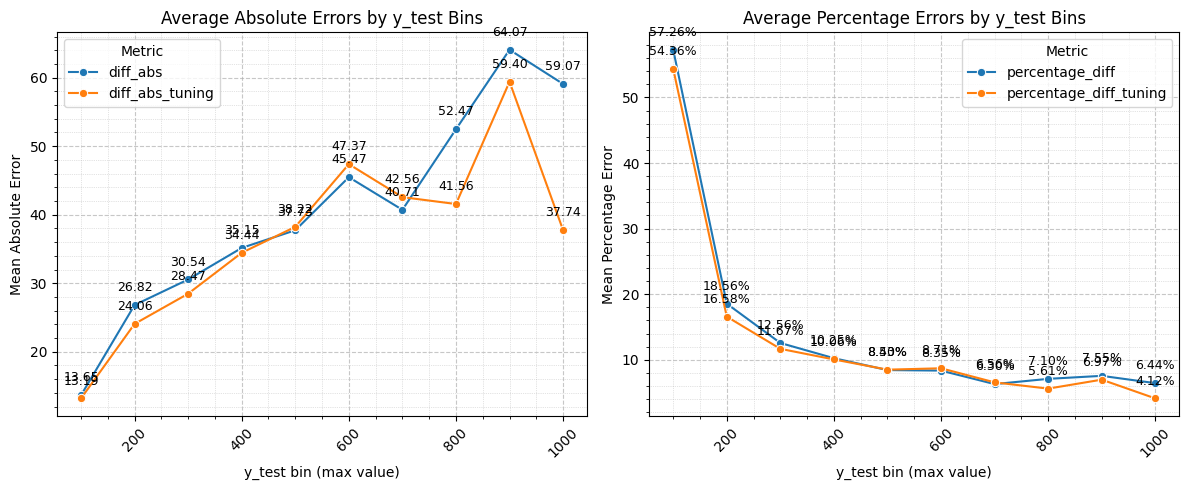

In [47]:
# Create the figure and axes: 1 row, 2 columns of subplots, with shared x-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# === First Plot: Absolute Errors ===

# Reshape data for seaborn plotting (wide to long format)
df_melted1 = binned_summary.melt(
    id_vars='y_test_under',
    value_vars=['diff_abs', 'diff_abs_tuning'],
    var_name='Metric',
    value_name='Value'
)

# Plot line chart for absolute errors
sns.lineplot(
    data=df_melted1,
    x='y_test_under',
    y='Value',
    hue='Metric',
    marker='o',
    ax=axes[0]
)

# Annotate each marker in first plot
for idx, row in df_melted1.iterrows():
    axes[0].annotate(
        f"{row['Value']:.2f}",
        (row['y_test_under'], row['Value']),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=9
    )

# Customize the first plot
axes[0].set_title('Average Absolute Errors by y_test Bins')
axes[0].set_xlabel('y_test bin (max value)')
axes[0].set_ylabel('Mean Absolute Error')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].minorticks_on()
axes[0].grid(which='minor', linestyle=':', linewidth='0.5', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

# === Second Plot: Percentage Errors ===

# Reshape data again for percentage errors
df_melted2 = binned_summary.melt(
    id_vars='y_test_under',
    value_vars=['percentage_diff', 'percentage_diff_tuning'],
    var_name='Metric',
    value_name='Value'
)

# Plot line chart for percentage errors
sns.lineplot(
    data=df_melted2,
    x='y_test_under',
    y='Value',
    hue='Metric',
    marker='o',
    ax=axes[1]
)

# Annotate each marker in second plot
for idx, row in df_melted2.iterrows():
    axes[1].annotate(
        f"{row['Value']:.2f}%",
        (row['y_test_under'], row['Value']),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=9
    )

# Customize the second plot
axes[1].set_title('Average Percentage Errors by y_test Bins')
axes[1].set_xlabel('y_test bin (max value)')
axes[1].set_ylabel('Mean Percentage Error')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].minorticks_on()
axes[1].grid(which='minor', linestyle=':', linewidth='0.5', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

* Dari grafik ini, terlihat bahwa semakin besar nilai **y\_test**, semakin besar pula nilai **absolute error**-nya, meskipun terdapat penurunan yang signifikan pada data dengan nilai antara 900 hingga 1000.

* Meskipun begitu, grafik ini juga menunjukkan bahwa model cenderung lebih akurat dalam memprediksi kondisi-kondisi dengan jumlah penyewaan sepeda di atas 200. Hal ini dapat dilihat dari grafik dan tabel, di mana error rata-rata di bawah 15% terjadi pada rentang data tersebut.


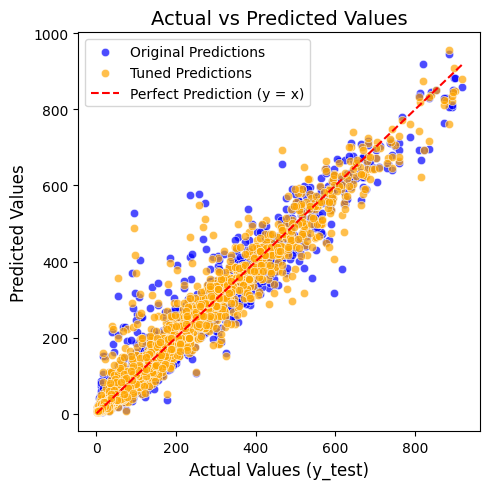

In [48]:
plt.figure(figsize=(5, 5))

# Plot original predictions
sns.scatterplot(
    data=df_compare_test,
    x='y_test',
    y='y_test_pred',
    label='Original Predictions',
    alpha=0.7,
    color='blue'
)

# Plot tuned predictions
sns.scatterplot(
    data=df_compare_test,
    x='y_test',
    y='y_test_pred_tuning',
    label='Tuned Predictions',
    alpha=0.7,
    color='orange'
)

# Perfect prediction line (y_test == y_pred)
sns.lineplot(
    x=df_compare_test['y_test'],
    y=df_compare_test['y_test'],
    color='red',
    linestyle='--',
    label='Perfect Prediction (y = x)'
)

# Labels and title
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Actual Values (y_test)', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

* Nilai error yang besar menyebabkan perbedaan yang cukup signifikan antara RMSE dan MAE. Hal ini juga terlihat pada plot di atas, di mana terdapat beberapa kasus jumlah penyewaan sepeda aktual yang rendah tetapi diprediksi jauh lebih tinggi (**overestimation**), serta sebaliknya (**underestimation**). Meskipun demikian, nilai MAPE yang diperoleh — sekitar 30% — masih dapat dikategorikan sebagai **reasonable forecasting**, sesuai dengan kriteria yang ditetapkan oleh Lewis (1982).

| MAPE (%) | Interpretasi                         |
| -------- | ------------------------------------ |
| < 10     | Sangat akurat (*highly accurate*)    |
| 10–20    | Baik (*good forecast*)               |
| 20–50    | Wajar (*reasonable forecast*)        |
| > 50     | Tidak akurat (*inaccurate forecast*) |

*Source: Lewis, C. D. (1982). Industrial and Business Forecasting Methods: A Practical Guide to Exponential Smoothing and Curve Fitting*

* Dari plot tersebut juga terlihat bahwa model yang telah dituning menghasilkan prediksi yang lebih mendekati garis nilai aktual.



##### **Feature Importances**

Untuk mengetahui fitur-fitur apa saja yang paling memengaruhi target (jumlah sepeda tersewa), kita dapat menggunakan kode di bawah ini untuk mengekstrak **feature importance** dari **StackingRegressor**, yaitu dengan **Permutation Importance**

In [49]:
# 3.1 Compute permutation importances on test‐set
perm = permutation_importance(
    best_model,
    X_test,
    y_test,
    scoring='neg_root_mean_squared_error',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# 3.2 Build a DataFrame and sort
imp_df = pd.DataFrame({
    'feature':      X_test.columns,
    'imp_mean':     perm.importances_mean,
    'imp_std':      perm.importances_std
}).sort_values('imp_mean', ascending=False)


- Feature Importance yang diambil dari best_model

In [50]:
imp_df

,feature,imp_mean,imp_std
11,hr,178.076296,2.872295
3,dayofweek,60.192453,2.143640
0,year,49.283324,1.439438
10,temp,29.349934,0.711978
5,hum,15.666533,1.856683
8,season,12.883780,0.573186
1,month,9.318687,0.768611
9,atemp,9.290456,0.709432
6,weathersit,8.782258,0.390026
7,holiday,5.691702,0.579344


Dari pemodelan yang sudah dilakukan dan ditunjukkan pada tabel di atas, fitur **'hr'**, **'dayofweek'**, **'year'**, **'temp'**, **'hum'**, dan **'season'** merupakan fitur yang paling berpengaruh terhadap variabel target **'cnt'**.

Metrik evaluasi yang digunakan pada model **StackingRegressor** adalah nilai **RMSE, MAE, MAPE**, dan **R²**. Jika ditinjau dari nilai **MAPE** yang dihasilkan oleh model setelah dilakukan **hyperparameter tuning**, yaitu sekitar **\~30%**, kita dapat menyimpulkan bahwa jika nanti model ini digunakan untuk memperkirakan jumlah sepeda yang akan disewa berdasarkan fitur-fitur yang tersedia dan prediksi cuaca dari sumber terpercaya, maka hasil prediksi model ini akan meleset sekitar **30%** dari jumlah sepeda yang seharusnya tersewa. Untuk prediksi di atas **200 sepeda**, kesalahan prediksi diperkirakan akan berada di bawah **17%**.

Namun, tidak menutup kemungkinan juga bahwa prediksinya bisa meleset lebih jauh karena **bias** yang masih cukup tinggi, jika dilihat dari visualisasi antara nilai aktual dan prediksi. Bias ini kemungkinan disebabkan oleh keterbatasan fitur dalam dataset yang belum bisa merepresentasikan secara menyeluruh aspek-aspek eksternal lain, seperti **promosi, kondisi jalan, event lokal**, atau **layanan publik lainnya** yang bisa memengaruhi jumlah penyewaan sepeda.

Model ini tentu masih bisa diimprovisasi agar dapat menghasilkan prediksi yang lebih akurat. Salah satu cara yang dapat dilakukan adalah dengan melakukan **A/B testing** terhadap model yang sudah dibuat dalam proyek ini untuk mengevaluasi tingkat efektivitas model dalam meningkatkan jumlah sewa sepeda. Dari hasil A/B testing tersebut, kita bisa mendapatkan insight tambahan terkait hal-hal yang perlu diperbaiki atau ditambahkan pada model agar hasil prediksinya menjadi lebih optimal.


## **6. Recommendation**

Lakukan **A/B testing** untuk menguji tingkat efektivitas model terhadap peningkatan jumlah sepeda yang tersewa jika dibandingkan dengan sistem prediksi tradisional atau estimasi manual yang dilakukan tanpa bantuan model.

Kemudian, beberapa hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi antara lain:

1. **Mengecek prediksi mana saja yang memiliki nilai error yang tinggi**. Kita dapat mengelompokkan error tersebut ke dalam dua grup utama: *overestimation* dan *underestimation*, lalu memilih 5% error paling ekstrem dari masing-masing grup. Setelah itu, kita akan memiliki tiga kelompok: *overestimation* (5%), *underestimation* (5%), dan grup mayoritas yang error-nya mendekati nilai rata-rata (90%). Selanjutnya, kita dapat mengevaluasi hubungan antara error tersebut dengan masing-masing fitur independen, sehingga bisa diidentifikasi fitur mana atau kondisi apa yang menyebabkan kesalahan prediksi tinggi. Dari hasil ini, kita dapat melakukan pelatihan ulang model dengan pendekatan *feature engineering* yang lebih tepat.

2. Jika memungkinkan, dilakukan **penambahan fitur yang lebih korelatif dengan target** ('cnt'), seperti data mengenai kondisi lalu lintas, adanya event lokal, atau informasi real-time lainnya yang berkaitan dengan perilaku pengguna sepeda. Selain itu, **penggunaan data cuaca yang lebih lengkap atau akurat dari sumber real-time** juga dapat membantu meningkatkan akurasi model.

3. Jika terjadi penambahan jumlah data yang signifikan dan lebih bervariasi, kita bisa mencoba **menggunakan model yang lebih kompleks**, seperti **recurrent neural networks (RNN)** atau model time-series lainnya. Namun, jika jumlah dan variasi data masih terbatas seperti pada dataset saat ini, penggunaan model yang lebih kompleks kemungkinan besar tidak akan memberikan peningkatan hasil yang signifikan.

4. **Model ini juga bisa dimanfaatkan sebagai dasar untuk pengembangan model lainnya**. Misalnya, model prediksi jumlah penyewaan sepeda berdasarkan segmentasi pengguna (commuter, tourist, dll) atau waktu tertentu (jam sibuk vs tidak sibuk). Jika tersedia, data tambahan seperti feedback atau rating pengguna bisa diolah menggunakan **sentiment analysis** untuk dijadikan fitur tambahan, yang pada akhirnya bisa meningkatkan kualitas prediksi.